In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, binom, norm
import scipy.stats as stats

# Autoreload of the files
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada'
# Create the data folder if it doesn't exist
os.makedirs(path, exist_ok=True)
os.makedirs(f"{path}/slides_images", exist_ok=True)
os.makedirs(f"{path}/slides_images/19_05_2025", exist_ok=True)

# Overfitting practice
***

In [4]:
# load data
data = pd.read_csv(f'{path}/data/overfitting_data.csv')

In [17]:
# Polynomial regression fit from x to y
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Load data
data = pd.read_csv(f'{path}/data/overfitting_data.csv')

# Fit polynomial regression
model_true = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_under = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_over = make_pipeline(PolynomialFeatures(12), LinearRegression())

model_true.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))
model_under.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))
model_over.fit(data['x'].to_numpy().reshape(-1, 1), data['y'].to_numpy().reshape(-1, 1))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=12)),
                ('linearregression', LinearRegression())])

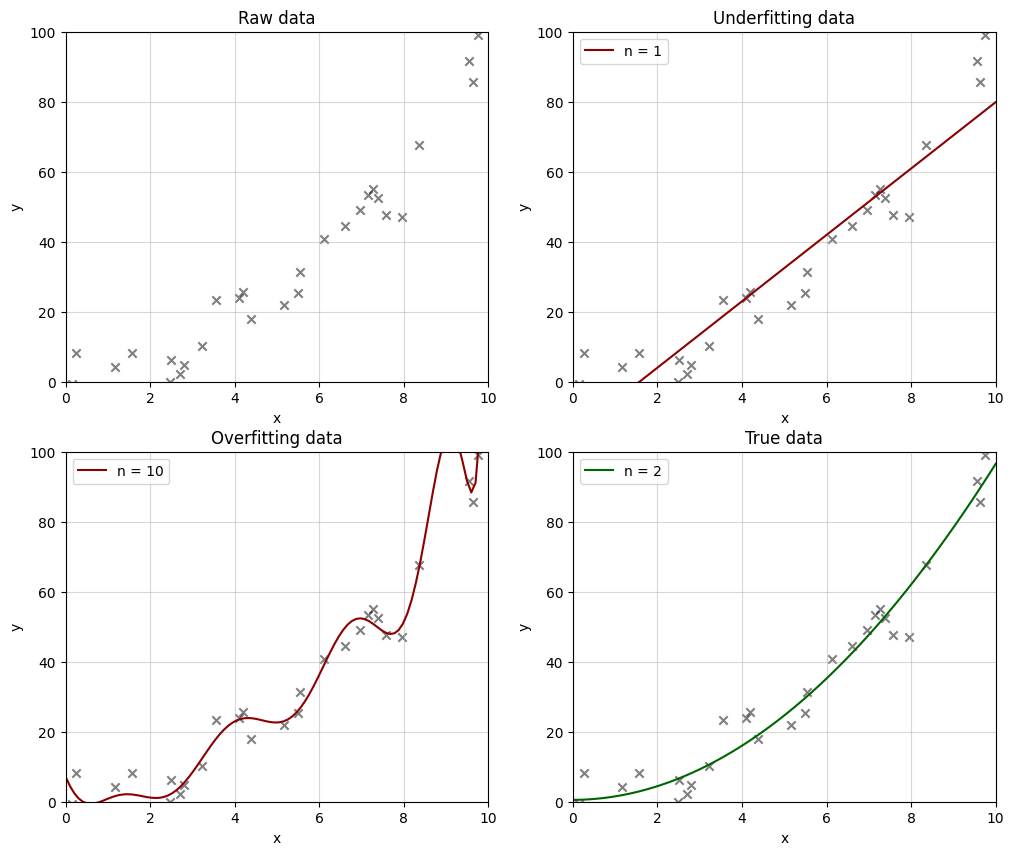

In [18]:
# Viz models
viz_x = np.linspace(0, 10, 100)

# Plot x,y
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.grid(True,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Raw data')

plt.subplot(2, 2, 2)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_under.predict(viz_x.reshape(-1, 1)), color='darkred', label='n = 1')
plt.grid(True,alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Underfitting data')

plt.subplot(2, 2, 3)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_over.predict(viz_x.reshape(-1, 1)), color='darkred', label='n = 10')
plt.grid(True,alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Overfitting data')

plt.subplot(2, 2, 4)
plt.scatter(data['x'], data['y'], color='black', alpha=0.5, marker='x')
plt.plot(viz_x, model_true.predict(viz_x.reshape(-1, 1)), color='darkgreen', label='n = 2')
plt.grid(True,alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('True data')
plt.savefig(f'{path}/slides_images/19_05_2025/overfitting.png')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load data
data = pd.read_csv(f'{path}/data/overfitting_data.csv')

# Fit polynomial regression
avg_rmse = np.zeros(10)
for n in range(1, 11):
    kf = KFold(n_splits=4)
    current_rmse = np.zeros(4)
    for i, (train_index, val_index) in enumerate(kf.split(data)):
        X_train = data['x'][train_index].to_numpy()
        y_train = data['y'][train_index].to_numpy()
        model = make_pipeline(PolynomialFeatures(n), LinearRegression())
        model.fit(X_train.reshape(-1, 1), y_train)

        X_val = data['x'][val_index].to_numpy()
        y_val = data['y'][val_index].to_numpy()
        y_pred = model.predict(X_val.reshape(-1, 1))
        current_rmse[i] = np.sqrt(mean_squared_error(y_val, y_pred))

RMSE for n=1: 11.832830981092314
RMSE for n=1: 9.997915938484407
RMSE for n=1: 8.885872356631408
RMSE for n=1: 8.995287738118613
RMSE for n=2: 7.5216221280133
RMSE for n=2: 5.820750567619837
RMSE for n=2: 3.4211094747009865
RMSE for n=2: 7.092407372110529
RMSE for n=3: 7.612896763174149
RMSE for n=3: 6.5246413397890555
RMSE for n=3: 3.5723585118739676
RMSE for n=3: 7.251024813771223
RMSE for n=4: 6.947097086257853
RMSE for n=4: 6.309745396943952
RMSE for n=4: 4.407630247528742
RMSE for n=4: 6.7856106265096665
RMSE for n=5: 7.126263943780818
RMSE for n=5: 6.577562520029785
RMSE for n=5: 4.541347346496911
RMSE for n=5: 6.745975288725356
RMSE for n=6: 8.926485159224422
RMSE for n=6: 7.083688905089604
RMSE for n=6: 4.504024317021583
RMSE for n=6: 8.187940926202476
RMSE for n=7: 9.081189367645434
RMSE for n=7: 7.102661019176419
RMSE for n=7: 4.369485491173378
RMSE for n=7: 8.270197357688605
RMSE for n=8: 13.241877946170192
RMSE for n=8: 9.688364487947142
RMSE for n=8: 4.299413855489355
RMSE

# Split
***

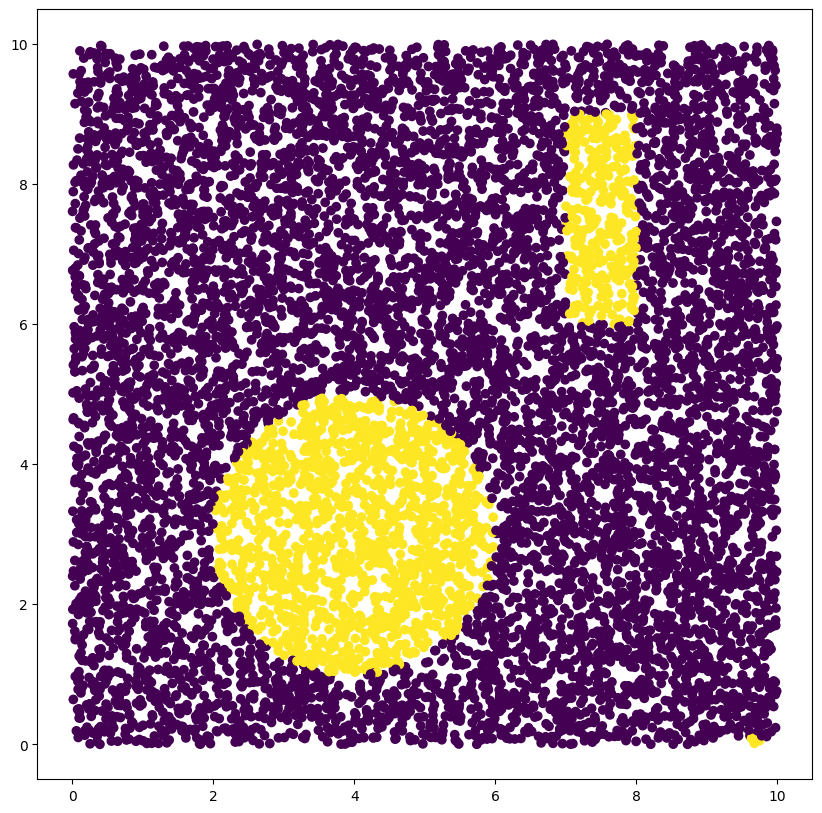

In [20]:
# Load and viz knn dataset
knn_dataset = pd.read_csv(f'{path}/data/knn_dataset.csv')

# Viz
plt.figure(figsize=(10,10))
plt.scatter(knn_dataset['x'], knn_dataset['y'], c=knn_dataset['target'], cmap='viridis')
plt.show()
